In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

In [4]:
def function(x, y):
    return 20 + (x ** 2 - 10 * np.cos(2 * np.pi * x)) + (y ** 2 - 10 * np.cos(2 * np.pi * y)) 

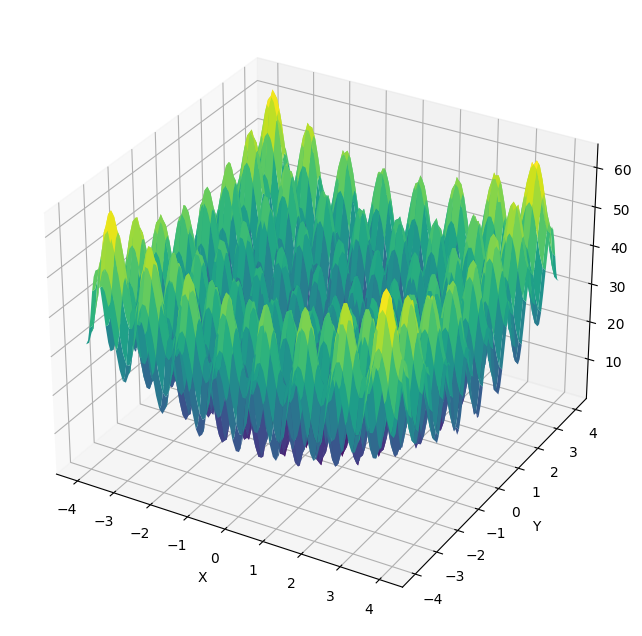

In [106]:
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
Z = function(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, Z, cmap = 'viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [122]:
fig = go.Figure(data = [go.Surface(z = Z, x = X, y = Y)])
fig.update_layout(scene = dict(
                      xaxis_title = 'X',
                      yaxis_title = 'Y',
                      zaxis_title = 'Z'))
fig.show()


Locator attempting to generate 1282 ticks ([0.6000000000000001, ..., 64.64999999999999]), which exceeds Locator.MAXTICKS (1000).


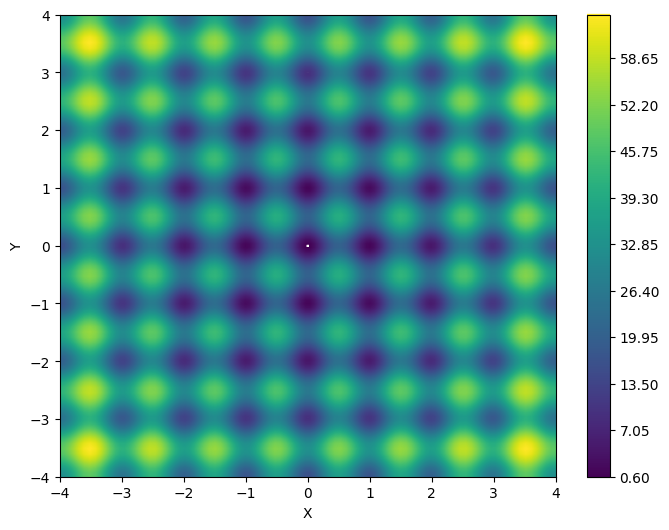

In [111]:
plt.figure(figsize = (8, 6))
contour = plt.contour(X, Y, Z, levels = 1500)
plt.colorbar(contour)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [35]:
def simulated_annealing(x0, y0, T = 100, T0 = 0.001, v = 0.99, M = 2):
    X_history = []
    X = [x0, y0]
    X_history.append(X)
    
    l = 0
    while T >= T0:
        l += 1
        X_new = [X[i] + np.random.randn() * T * ((1 + l / T) ** (2 * np.random.uniform(0, 1) - 1)) for i in range(M)]

        if any(X_new) > 4.0 or any(X_new) < -4.0:
            continue

        F_X = function(X[0], X[1])
        F_X_new = function(X_new[0], X_new[1])
        
        if F_X_new - F_X < 0:
            X = X_new
            X_history.append(X)
        else:
            p = np.exp(-(F_X_new - F_X) / T)
            if p > np.random.uniform(0, 1):
                X = X_new
                X_history.append(X)
            else: 
                T *= v
    
    return np.array(X_history), X, function(X[0], X[1])


In [36]:
x0, y0 = 10, 10
resalts = simulated_annealing(x0, y0)
values_history = [function(point[0], point[1]) for point in resalts[0]]

In [38]:
print(f"F({resalts[1]}) = {resalts[2]}")

F([0.0010082951374765043, 0.0009896207047123931]) = 0.00039599094509945587


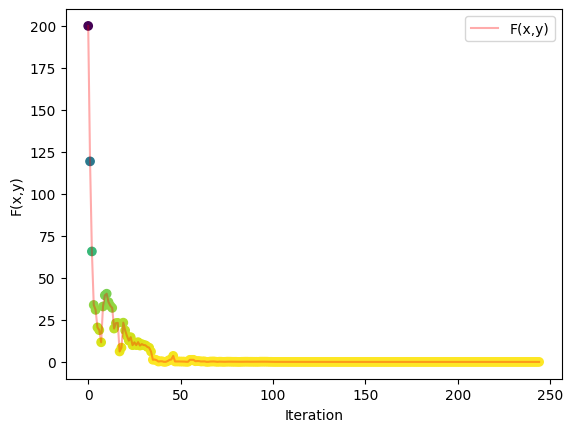

In [39]:
plt.plot(values_history, c = 'r', alpha = 0.33, label = 'F(x,y)')
plt.scatter(range(len(values_history)), values_history, c = -np.array(values_history), cmap = 'viridis')
plt.xlabel('Iteration')
plt.ylabel('F(x,y)')
plt.legend()
plt.show()

In [40]:
print(f"MAE: {mean_absolute_error((0, ), (resalts[2], ))}")
print(f"MSE: {mean_squared_error((0, ), (resalts[2], ))}")

MAE: 0.00039599094509945587
MSE: 1.5680882860076028e-07
